# classify the Size_Categorie using SVM

month	month of the year: 'jan' to 'dec'
day	day of the week: 'mon' to 'sun'
FFMC	FFMC index from the FWI system: 18.7 to 96.20
DMC	DMC index from the FWI system: 1.1 to 291.3
DC	DC index from the FWI system: 7.9 to 860.6
ISI	ISI index from the FWI system: 0.0 to 56.10
temp	temperature in Celsius degrees: 2.2 to 33.30
RH	relative humidity in %: 15.0 to 100
wind	wind speed in km/h: 0.40 to 9.40
rain	outside rain in mm/m2 : 0.0 to 6.4
Size_Categorie 	the burned area of the forest ( Small , Large)

In [11]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import seaborn as sn

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("forestfires.csv")
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
data['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [6]:
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [4]:
encoder=LabelEncoder()
data['month']=encoder.fit_transform(data['month'])
data['day']=encoder.fit_transform(data['day'])
data['size_category']=encoder.fit_transform(data['size_category'])

In [7]:
data=data.drop(columns=['dayfri','daymon','daysat','daysun','daythu','daytue','daywed','monthapr','monthaug','monthdec',
                        'monthfeb','monthjan','monthjul','monthjun','monthmar','monthmay','monthnov','monthoct','monthsep'])

In [5]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
data.describe()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,5.758221,2.736944,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.731141
std,4.373275,1.925061,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.443796
min,0.000000,0.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000
50%,6.000000,3.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,1.000000
75%,11.000000,4.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,1.000000
max,11.000000,6.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000


In [29]:
data.info

<bound method DataFrame.info of      month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
0        7    0  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00   
1       10    5  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00   
2       10    2  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00   
3        7    0  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00   
4        7    3  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00   
..     ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...   
512      1    3  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44   
513      1    3  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29   
514      1    3  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16   
515      1    2  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00   
516      9    5  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00   

     size_category  
0                1  
1                1  
2               

<AxesSubplot:xlabel='size_category', ylabel='count'>

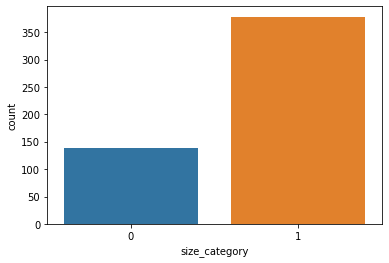

In [12]:
sn.countplot('size_category',data=data)

In [13]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


In [14]:
data['month'].value_counts()

1     184
11    172
7      54
5      32
3      20
6      17
10     15
0       9
2       9
4       2
8       2
9       1
Name: month, dtype: int64

In [15]:
x=data.iloc[:,:-1]
y=data['size_category']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

In [16]:
#Building Basic Model
basic_model=SVC(kernel='rbf',gamma=0.5)
basic_model.fit(x_train,y_train)
y_pred=basic_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.02      0.04        47
           1       0.70      1.00      0.83       109

    accuracy                           0.71       156
   macro avg       0.85      0.51      0.43       156
weighted avg       0.79      0.71      0.59       156



<AxesSubplot:xlabel='size_category', ylabel='count'>

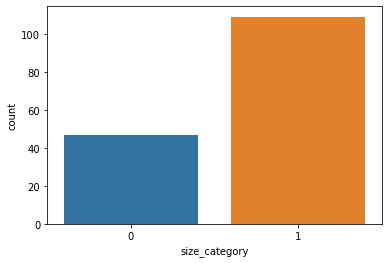

In [17]:
sn.countplot(y_test)

<AxesSubplot:ylabel='count'>

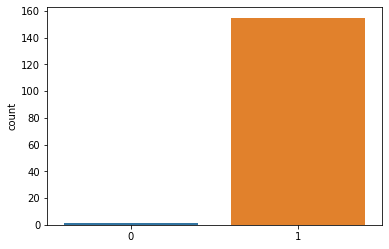

In [18]:
sn.countplot(y_pred)

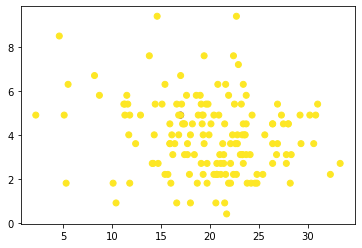

In [20]:
Pred=pd.DataFrame(y_pred)
plt.scatter(x_test['temp'],x_test['wind'],c=y_pred)

In [21]:
Pred.value_counts()

1    155
0      1
dtype: int64

In [22]:
model=SVC()
Params={
    'kernel':['linear', 'rbf'],
    'gamma':[2,1,0.5,0.2,0.002],
    'C':[1,10,50]
}
gscv=GridSearchCV(model,Params,cv=5)
gscv.fit(x_train,y_train)
gscv.best_score_

0.986111111111111

In [23]:
gscv.best_params_

{'C': 10, 'gamma': 2, 'kernel': 'linear'}

In [24]:
final_model=SVC(kernel='linear',gamma=2,C=10)
final_model.fit(x_train,y_train)
y_pred=final_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        47
           1       0.97      0.97      0.97       109

    accuracy                           0.96       156
   macro avg       0.95      0.95      0.95       156
weighted avg       0.96      0.96      0.96       156



<AxesSubplot:xlabel='size_category', ylabel='count'>

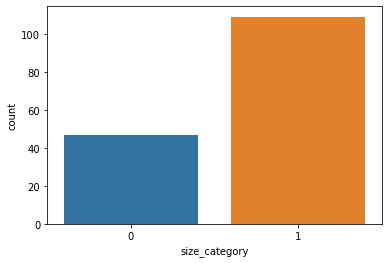

In [25]:
sn.countplot(y_test)

<AxesSubplot:ylabel='count'>

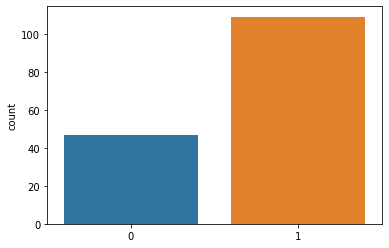

In [26]:
sn.countplot(y_pred)

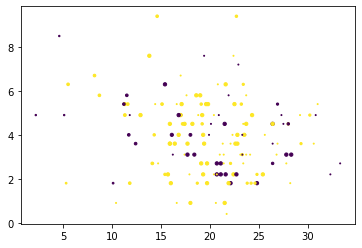

In [27]:
plt.scatter(x_test['temp'],x_test['wind'],x_test['month'],c=y_pred)